# Feature extraction code of Task 2

In [1]:
import numpy as np
import pandas as pd

def normalize(df):
    from sklearn.preprocessing import MinMaxScaler
    scaler=MinMaxScaler();
    
    norm_df=pd.DataFrame(scaler.fit_transform(df[['ch1','ch2']]))
    norm_df.columns=['ch1','ch2']
    norm_df['time']=df['timestamp_ms']
    return norm_df

def mean_sq(arr):
    ms=0
    for i in arr:
        ms+=(i**2)
    return ms/len(arr)

def compute_ssc(signal):
    diff1 = np.diff(signal[:-1])
    diff2 = np.diff(signal[1:])
    # return np.sum(((diff1 * diff2) < 0) & (np.abs(diff1 - diff2) > threshold))
    return np.sum((diff1 * diff2) < 0)

def extract(df,window_size=100,step_size=10):
    new_df=pd.DataFrame({
    'time':[],
    'rms_ch1':[],
    'rms_ch2':[],
    'mav_ch1':[],
    'mav_ch2':[],
    'mse_ch1':[],
    'mse_ch2':[],
    'WL_ch1':[],
    'WL_ch2':[],
    'SSC_ch1':[],
    'SSC_ch2':[],
    })

    n=len(df)
    for i in range(0,n-window_size+1,step_size):
        ch1=df['ch1'][i:i+window_size] # to access only 100 elements of ch1 at a time
        ch2=df['ch2'][i:i+window_size]
        
        row={
        'mse_ch1':[mean_sq(ch1)],
        'mse_ch2':[mean_sq(ch2)],
        'mav_ch1':[np.mean(ch1)],
        'mav_ch2':[np.mean(ch2)],
        'time':[np.mean(df['time'][i:i+window_size])],
        'WL_ch1':[np.sum(np.abs(np.diff(ch1)))],
        'WL_ch2':[np.sum(np.abs(np.diff(ch2)))],
        'SSC_ch1':[compute_ssc(df['ch1'])],
        'SSC_ch2':[compute_ssc(df['ch2'])],
        }
        
        row['rms_ch1']=np.sqrt(row['mse_ch1'])
        row['rms_ch2']=np.sqrt(row['mse_ch2'])
        
        new_df=pd.concat([new_df,pd.DataFrame(row)],ignore_index=True)
        
    return new_df

def get_feature(file_loc,suffix):
    df=pd.read_csv(file_loc)
    norm_df=normalize(df)
    new_df=extract(norm_df)
    new_df['label']=np.full(len(new_df),df['label'][0])
    new_df.to_csv(f'features_{suffix}.csv',index=False)
    return new_df

# 1. Combine all Feature Files

In [2]:
files=['clenched_data.csv','fist_data.csv','four_data.csv','index_finger_data.csv','okay_data.csv','peace_data.csv','rest_data.csv','rock_data.csv','spread_data.csv','three_data.csv','thumb_data.csv','up_data.csv']

df=pd.DataFrame()
for f in files:
    df=pd.concat([df,get_feature(f'Dataset/{f}',f[0:f.rindex('_')])],ignore_index=True)
df

,time,rms_ch1,rms_ch2,mav_ch1,mav_ch2,mse_ch1,mse_ch2,WL_ch1,WL_ch2,SSC_ch1,SSC_ch2,label
0,495.0,0.609791,0.590523,0.529388,0.516122,0.371845,0.348717,33.693878,34.408163,3873.0,3929.0,clenched
1,595.0,0.605118,0.576764,0.535306,0.505102,0.366168,0.332657,30.775510,33.387755,3873.0,3929.0,clenched
2,695.0,0.581611,0.584846,0.509592,0.510816,0.338272,0.342045,31.040816,35.959184,3873.0,3929.0,clenched
3,795.0,0.572619,0.592181,0.494898,0.519592,0.327893,0.350679,33.530612,36.285714,3873.0,3929.0,clenched
4,895.0,0.566079,0.597353,0.485510,0.522245,0.320446,0.356830,34.224490,35.979592,3873.0,3929.0,clenched
...,...,...,...,...,...,...,...,...,...,...,...,...
7087,59095.0,0.558088,0.583538,0.475102,0.496735,0.311462,0.340516,33.265306,39.346939,3861.0,3863.0,up
7088,59195.0,0.544779,0.585849,0.463673,0.505102,0.296785,0.343219,31.102041,38.081633,3861.0,3863.0,up
7089,59295.0,0.539702,0.598749,0.455102,0.518367,0.291279,0.358501,31.244898,38.326531,3861.0,3863.0,up
7090,59395.0,0.540605,0.602248,0.452245,0.520612,0.292253,0.362703,30.755102,36.408163,3861.0,3863.0,up


#  2. Encode the Labels

- Use LabelEncoder from sklearn.preprocessing to convert gesture names into numeric labels (0–11)

In [3]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['label']=enc.fit_transform(df['label'])
df

,time,rms_ch1,rms_ch2,mav_ch1,mav_ch2,mse_ch1,mse_ch2,WL_ch1,WL_ch2,SSC_ch1,SSC_ch2,label
0,495.0,0.609791,0.590523,0.529388,0.516122,0.371845,0.348717,33.693878,34.408163,3873.0,3929.0,0
1,595.0,0.605118,0.576764,0.535306,0.505102,0.366168,0.332657,30.775510,33.387755,3873.0,3929.0,0
2,695.0,0.581611,0.584846,0.509592,0.510816,0.338272,0.342045,31.040816,35.959184,3873.0,3929.0,0
3,795.0,0.572619,0.592181,0.494898,0.519592,0.327893,0.350679,33.530612,36.285714,3873.0,3929.0,0
4,895.0,0.566079,0.597353,0.485510,0.522245,0.320446,0.356830,34.224490,35.979592,3873.0,3929.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7087,59095.0,0.558088,0.583538,0.475102,0.496735,0.311462,0.340516,33.265306,39.346939,3861.0,3863.0,11
7088,59195.0,0.544779,0.585849,0.463673,0.505102,0.296785,0.343219,31.102041,38.081633,3861.0,3863.0,11
7089,59295.0,0.539702,0.598749,0.455102,0.518367,0.291279,0.358501,31.244898,38.326531,3861.0,3863.0,11
7090,59395.0,0.540605,0.602248,0.452245,0.520612,0.292253,0.362703,30.755102,36.408163,3861.0,3863.0,11


- Print a dictionary mapping of label numbers to gesture names.


In [4]:
enc.classes_ # converted to numeric label from 0 - 11

array(['clenched', 'fist', 'four', 'index_finger', 'okay', 'peace',
       'rest', 'rock', 'spread', 'three', 'thumb', 'up'], dtype=object)

In [5]:
# Method - 1
print(pd.concat([pd.DataFrame(enc.classes_),pd.DataFrame(df['label'].unique())],axis='columns'))

               0   0
0       clenched   0
1           fist   1
2           four   2
3   index_finger   3
4           okay   4
5          peace   5
6           rest   6
7           rock   7
8         spread   8
9          three   9
10         thumb  10
11            up  11


In [6]:
# Method - 2
label_to_gesture={i:label for i,label in enumerate(enc.classes_)}
print(label_to_gesture) 

{0: 'clenched', 1: 'fist', 2: 'four', 3: 'index_finger', 4: 'okay', 5: 'peace', 6: 'rest', 7: 'rock', 8: 'spread', 9: 'three', 10: 'thumb', 11: 'up'}


# 3. Split the Dataset

In [7]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['time','label'])
# x=df[['SSC_ch1','SSC_ch2']] for 100% accuracy on all models
x

,rms_ch1,rms_ch2,mav_ch1,mav_ch2,mse_ch1,mse_ch2,WL_ch1,WL_ch2,SSC_ch1,SSC_ch2
0,0.609791,0.590523,0.529388,0.516122,0.371845,0.348717,33.693878,34.408163,3873.0,3929.0
1,0.605118,0.576764,0.535306,0.505102,0.366168,0.332657,30.775510,33.387755,3873.0,3929.0
2,0.581611,0.584846,0.509592,0.510816,0.338272,0.342045,31.040816,35.959184,3873.0,3929.0
3,0.572619,0.592181,0.494898,0.519592,0.327893,0.350679,33.530612,36.285714,3873.0,3929.0
4,0.566079,0.597353,0.485510,0.522245,0.320446,0.356830,34.224490,35.979592,3873.0,3929.0
...,...,...,...,...,...,...,...,...,...,...
7087,0.558088,0.583538,0.475102,0.496735,0.311462,0.340516,33.265306,39.346939,3861.0,3863.0
7088,0.544779,0.585849,0.463673,0.505102,0.296785,0.343219,31.102041,38.081633,3861.0,3863.0
7089,0.539702,0.598749,0.455102,0.518367,0.291279,0.358501,31.244898,38.326531,3861.0,3863.0
7090,0.540605,0.602248,0.452245,0.520612,0.292253,0.362703,30.755102,36.408163,3861.0,3863.0


In [8]:
y=df['label']
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [9]:
x_train , y_train

(       rms_ch1   rms_ch2   mav_ch1   mav_ch2   mse_ch1   mse_ch2     WL_ch1  \
 3171  0.603961  0.603140  0.542245  0.521429  0.364769  0.363778  33.367347   
 5206  0.562396  0.577252  0.472449  0.495918  0.316289  0.333219  35.510204   
 5395  0.580314  0.565704  0.511224  0.492857  0.336764  0.320021  28.959184   
 6762  0.635235  0.557535  0.560816  0.472653  0.403524  0.310845  38.326531   
 6063  0.545165  0.536902  0.465510  0.452653  0.297205  0.288263  32.040816   
 ...        ...       ...       ...       ...       ...       ...        ...   
 6790  0.602908  0.587482  0.517551  0.500612  0.363499  0.345135  38.224490   
 126   0.587589  0.569779  0.504694  0.488980  0.345260  0.324648  32.530612   
 6210  0.565431  0.572004  0.491633  0.482857  0.319713  0.327189  32.571429   
 4851  0.562818  0.634687  0.481837  0.557347  0.316764  0.402828  32.265306   
 4085  0.625386  0.602362  0.554490  0.520816  0.391108  0.362840  36.326531   
 
          WL_ch2  SSC_ch1  SSC_ch2  
 

# 4-6. Training, evaluation and visualisation of Logistic Regression, KNN and SVM Models

c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       119
           2       1.00      1.00      1.00       118
           3       1.00      1.00      1.00       119
           4       1.00      1.00      1.00       119
           5       1.00      1.00      1.00       118
           6       1.00      1.00      1.00       118
           7       1.00      1.00      1.00       118
           8       1.00      1.00      1.00       118
           9       1.00      1.00      1.00       118
          10       1.00      1.00      1.00       118
          11       1.00      1.00      1.00       118

    accuracy                           1.00      1419
   macro avg       1.00      1.00      1.00      1419
weighted avg       1.00      1.00      1.00      1419



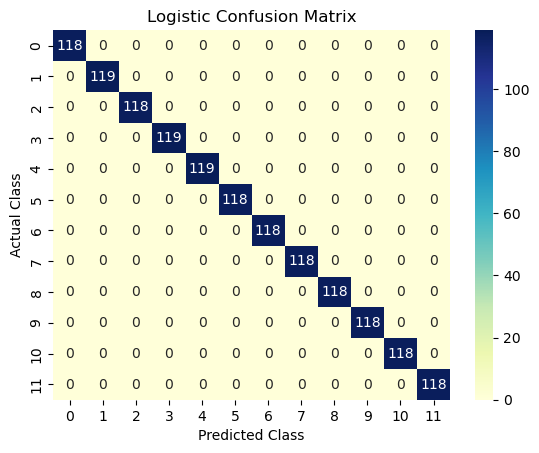

c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       0.00      0.00      0.00       119
           2       1.00      1.00      1.00       118
           3       0.00      0.00      0.00       119
           4       0.00      0.00      0.00       119
           5       1.00      1.00      1.00       118
           6       1.00      1.00      1.00       118
           7       0.50      1.00      0.66       118
           8       1.00      1.00      1.00       118
           9       0.50      1.00      0.66       118
          10       0.50      1.00      0.66       118
          11       1.00      1.00      1.00       118

    accuracy                           0.75      1419
   macro avg       0.62      0.75      0.67      1419
weighted avg       0.62      0.75      0.66      1419



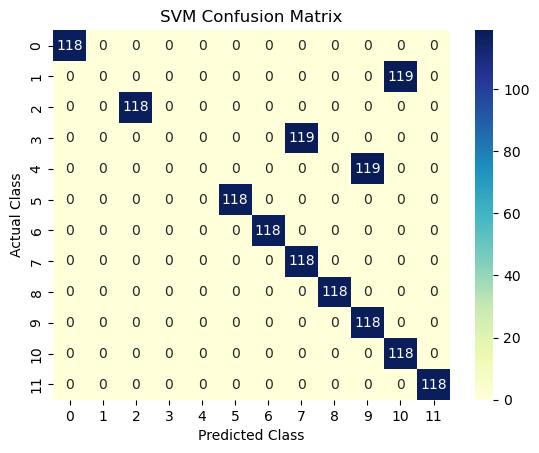

KNN Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       119
           2       1.00      1.00      1.00       118
           3       1.00      1.00      1.00       119
           4       1.00      1.00      1.00       119
           5       1.00      1.00      1.00       118
           6       1.00      1.00      1.00       118
           7       1.00      1.00      1.00       118
           8       1.00      1.00      1.00       118
           9       1.00      1.00      1.00       118
          10       1.00      1.00      1.00       118
          11       1.00      1.00      1.00       118

    accuracy                           1.00      1419
   macro avg       1.00      1.00      1.00      1419
weighted avg       1.00      1.00      1.00      1419



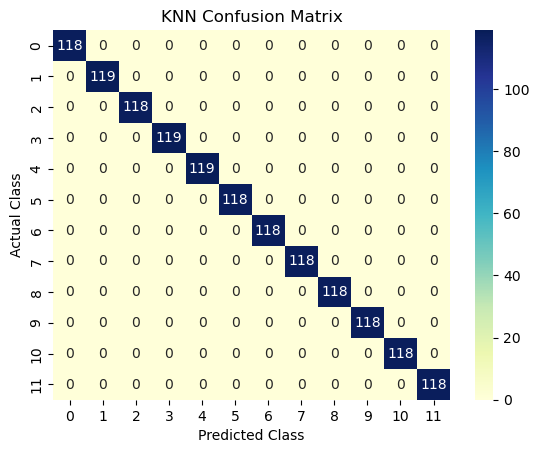

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


models = {
    "Logistic": LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=1000),
    "SVM": SVC(kernel='rbf',max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

for name, model in models.items():
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    print(f"{name} Report:\n", classification_report(y_test, preds))
    cm=confusion_matrix(y_test, preds)
    sns.heatmap(cm,annot=True,fmt='d',cmap='YlGnBu')
    plt.title(f"{name} Confusion Matrix")
    plt.ylabel("Actual Class")
    plt.xlabel("Predicted Class")
    plt.show()